# Product and Customer Analytics

In [1]:
# Import  the appropriate libraries

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
%matplotlib inline

In [2]:
# import the dataset from UCI machine learning laboratory site. It is an excel file

df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [3]:
# Check the shape

df.shape

(541909, 8)

In [4]:
# Use the head function

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Distribution of the Quantity Column

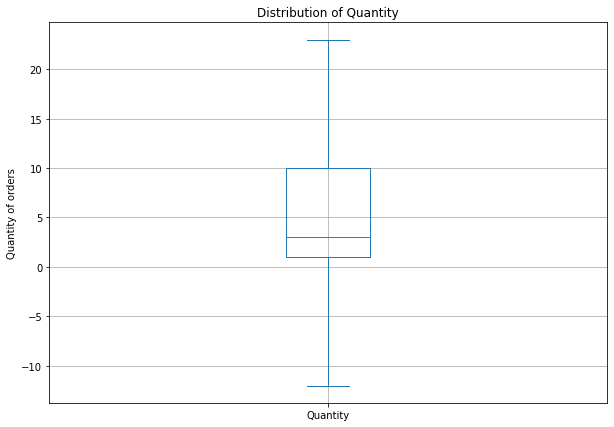

In [5]:
# Create a box plot to identify outliers

ax = df['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('Quantity of orders')
ax.set_title('Distribution of Quantity')

plt.suptitle("")
plt.show()

In [6]:
# Filter out the negative quantity orders

df = df[df['Quantity'] > 0]

In [7]:
# Check the shape again

df.shape

(531285, 8)

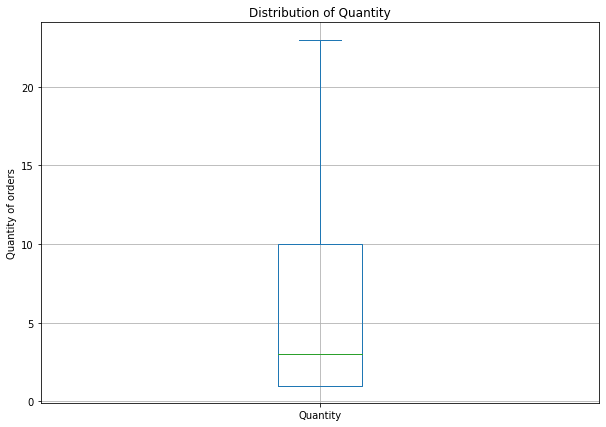

In [8]:
# Create a Box plot without negative quantity

ax = df['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('Quantity of orders')
ax.set_title('Distribution of Quantity')

plt.suptitle("")
plt.show()

## Time Series Trends
- Number of orders
- Revenue

In [9]:
# Resample function resamples the data and converts the data into the desired 
# Summarize the data on a monthly basis 

m_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [10]:
m_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

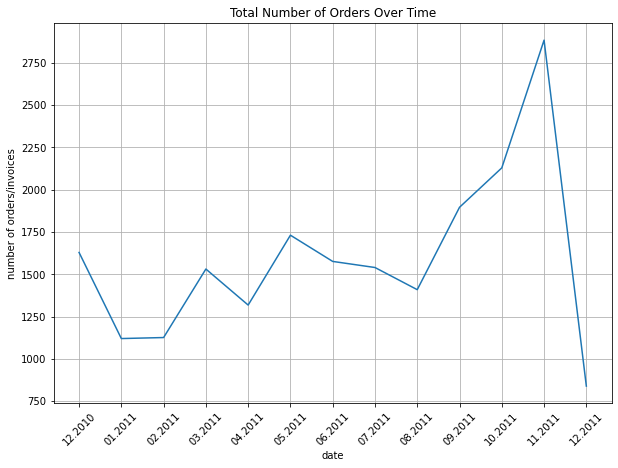

In [11]:
# Create a Line Chart for the data 
ax = pd.DataFrame(m_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# use x.strftime('%m.%Y'), where x is the Python date object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Python date object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df.index], 
    rotation=45
)

plt.show()

In [12]:
# Get all invoice dates from December 1, 2011 

invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

In [13]:
# Print Min and Max dates in that series

print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


### Q1. What do you observe?

### A1.
The line plot is showing the trend of the number of orders in the year 2011. In 2010, The number of order were around 1700 and It dropped, over the period of one month, to 1100 and was almost same until next month (02/2011). From that stage, the number  of orders started increasing with some fluctuations and reached at the point of around 2800, in November, 2011. At the end of year, There was the sharpest decline in the entire time period where it ended at a count of 839 .

In [14]:
# Remove the December 2011 data

df = df[df['InvoiceDate'] < "2011-12-01"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
# Recalculate the monthly distribution

m_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

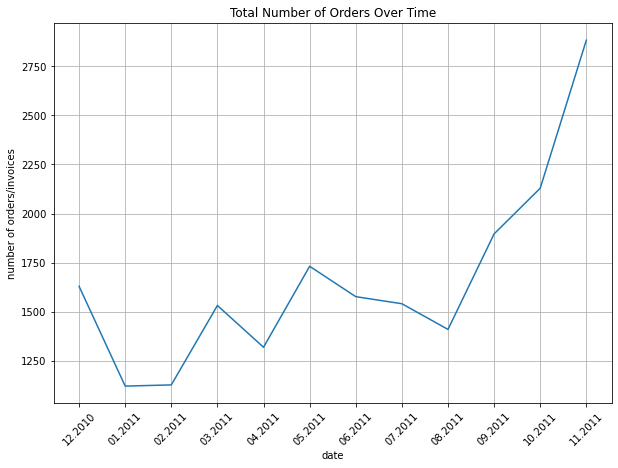

In [16]:
# Create the line chart again

ax = pd.DataFrame(m_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df.index], 
    rotation=45
)

plt.show()

In [17]:
# Calculate sales

df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [18]:
# Look at monthly revenue data by using sum as an aggregate function

m_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()
m_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

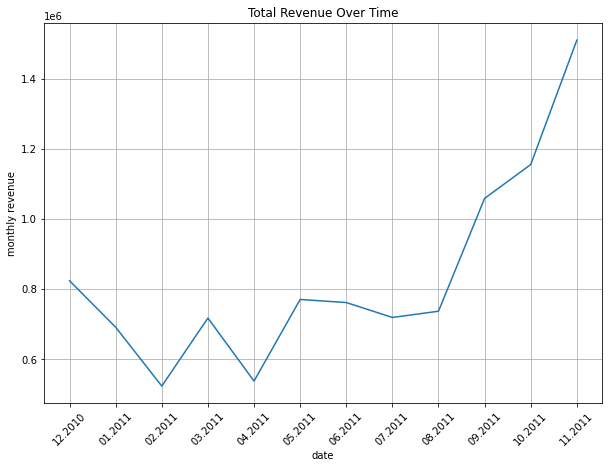

In [19]:
# Create a Line Plot for revenue

ax = pd.DataFrame(m_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('monthly revenue')
ax.set_title('Total Revenue Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_revenue_df.index)), 
    [x.strftime('%m.%Y') for x in m_revenue_df.index], 
    rotation=45
)

plt.show()

### Q2. Do you see a similar pattern with the order by month line chart? Comment

### A2. 
Yes, the pattern is highly similar. Although we do observe 2 noticeable differences in the slope of the both the curves:
i) The first difference we can see is that in the time of January to February 2011, the slope was negative and It was sharp when it came to the revenue over time, however the slope was almost zero for the orders over time chart in this period.
ii) The second difference we can see is in the period of May 2011 to August 2011. The number of orders were decreasing over the period of time chart as compared to the revenue over time chart.

## Repeat Customers

In [20]:
# Run the head function on the original dataframe

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Q3. What do you notice with the invoice number?

### A3.
We can see that the invoice number is repeated. This means that the same customer has ordered multiple items/products from the company.

## Calculate the repeat customers

In [21]:
# Aggregate the raw data for each Invoice No.

invoice_df = df.groupby(by=['InvoiceNo', 'InvoiceDate']
                       ).agg({'Sales': sum,'CustomerID': max, 'Country': max,}
                            ).reset_index()

In [22]:
invoice_df.head()

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom


In [23]:
# Aggregate by month
# Group by Month and CustomerID. 
# Filter selects customers who have more than one record in the group
# Basically customers with more than one order in a month

m_repeat_customers_df = invoice_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

In [24]:
m_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [25]:
# Calculate the unique customers

m_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
m_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [26]:
# Compare the repeat and unique customers by month and calculate percentage by month

m_repeat_percentage = m_repeat_customers_df/m_unique_customers_df*100.0
m_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

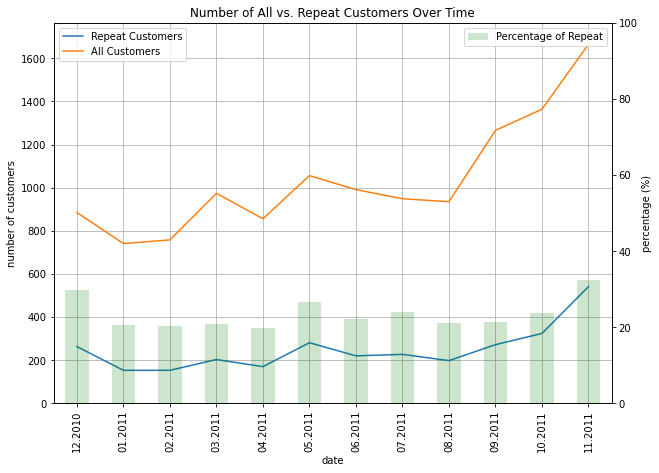

In [27]:
# Visualize these two in a dual axis chart

plot1 = pd.DataFrame(m_repeat_customers_df.values).plot(
    figsize=(10,7))

pd.DataFrame(m_unique_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_repeat_percentage.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)

plot1.set_xlabel('date')
plot1.set_ylabel('number of customers')
plot1.set_title('Number of All vs. Repeat Customers Over Time')

plot2.set_ylabel('percentage (%)')

plot1.legend(['Repeat Customers', 'All Customers'])
plot2.legend(['Percentage of Repeat'], loc='upper right')

plot1.set_ylim([0, m_unique_customers_df.values.max()+100])
plot2.set_ylim([0, 100])

plt.xticks(
    range(len(m_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in m_repeat_customers_df.index], 
    rotation=45
)
plt.show()

### Q4. Comment on the distribution

### A4. 

The given chart shows us the number of customers across the entire time period with number of customers on the y-axis while the date(time) on the x-axis. The secondary y-axis shows us the percentage of repeated customers in the period.

We can see that both the curves have very similar slopes across the entire period. That is both the curves are almost facing the same amount of change in the entire period. The orange curve represents all the customers, while the blue curve represents the repeat customers.
If we see the bar chart in green, we can see the percentage of repeat customers and its changes across the year. We can see that the highest percentage of repeat customers were present in the month of November 2011 that was more than 15% of all the customers in that month were repeat customers. This could be attributed to the fact that the number of orders in the December 2011 is the lowest as seen previously.A key observation here is the gap between the total customers and the repeat customers which is quite high as shown by the space between the curves.

This is highly concerning, as the only time the percentage of repeat customers crosses 10% in the entire time period is in the month of November 2011.

In [28]:
# Calculate Monthly revenue of repeat customers

m_repeat_customers_revenue = invoice_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

In [29]:
# Calculate and show the % of revenue for repeat and all customers by month

m_repeat_customers_revenue_percentage= (m_repeat_customers_revenue/m_revenue_df)*100
print(m_repeat_customers_revenue_percentage)

InvoiceDate
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.519810
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    43.029595
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696
Freq: M, Name: Sales, dtype: float64


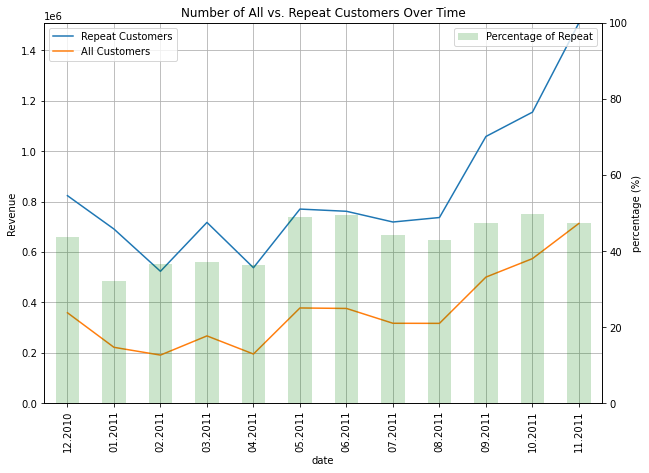

In [30]:
# Plot the chart for Revenue and % (Dual axis chart)

# Visualize these two in a dual axis chart

plot1 = pd.DataFrame(m_revenue_df.values).plot(
    figsize=(10,7))

pd.DataFrame(m_repeat_customers_revenue.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_repeat_customers_revenue_percentage.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)

plot1.set_xlabel('date')
plot1.set_ylabel('Revenue')
plot1.set_title('Number of All vs. Repeat Customers Over Time')

plot2.set_ylabel('percentage (%)')

plot1.legend(['Repeat Customers', 'All Customers'])
plot2.legend(['Percentage of Repeat'], loc='upper right')

plot1.set_ylim([0, m_revenue_df.values.max()+100])
plot2.set_ylim([0, 100])

plt.xticks(
    range(len(m_repeat_customers_revenue.index)), 
    [x.strftime('%m.%Y') for x in m_repeat_customers_revenue.index], 
    rotation=45
)
plt.show()

### Q5. Comment on the distribution

### A5. 
We can see that the following chart shows us the revenue vs time. While the orange curve shows us all the customers in a particular month and the blue curve shows us the number of repeat customers in a particular month. The green bars show us the percentage of repeat customers in a particular month.

Over here we can see that, the slope of both the curves is similar apart from the 2 differences as mentioned previously in question 3. We can also see that the gap between the number of total customers vs number of repeat customers here is reduced as compared to the previous chart in question 4. What this means here is that the revenue generated by the repeat customers is considerable even though their number might be low. We can notice a similar phenomenon in this chart as in the previous chart in question 4 when it comes to the percentage of repeat customers. That is, only in November 2011 did the percentage of repeat customers went over 10% in the entire time period.

## Trending Items Over Time 

- How customers engage with individual products

### By Quantity

In [31]:
# Group the datafarme by month with stock code which is really the product ID

m_item_df = pd.DataFrame(df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum())
m_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  C2              173
            DCGSSGIRL         1
            DOT              47
            M              3894
            POST           1262

[31701 rows x 1 columns]

In [32]:
# Lets find out what items were sold the most by quantity on November 30, 2011
# Rank items by the last month sales by sorting by quantity

last_m_sorted_df = m_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()
last_m_sorted_df

,InvoiceDate,StockCode,Quantity
0,2011-11-30,23084,14954
1,2011-11-30,84826,12551
2,2011-11-30,22197,12460
3,2011-11-30,22086,7908
4,2011-11-30,85099B,5909
...,...,...,...
2941,2011-11-30,84549,1
2942,2011-11-30,84527,1
2943,2011-11-30,90082B,1
2944,2011-11-30,90082D,1


### By Sales

In [33]:
# Group the datafarme by month with stock code which is really the product ID and calculate the sales

m_item_sales_df = pd.DataFrame(df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum())
m_item_sales_df

Sales
InvoiceDate StockCode          
2010-12-31  10002        234.41
            10120          3.36
            10125         90.86
            10133         85.27
            10135        279.02
...                         ...
2011-11-30  C2          1150.00
            DCGSSGIRL      3.29
            DOT        36905.40
            M           3312.42
            POST       10352.98

[31701 rows x 1 columns]

In [34]:
# Lets find out what items were sold the most by sales on November 30, 2011

last_m_rev_sorted_df = m_item_sales_df.loc['2011-11-30'].sort_values(
    by='Sales', ascending=False
).reset_index()
last_m_rev_sorted_df

,InvoiceDate,StockCode,Sales
0,2011-11-30,DOT,36905.40
1,2011-11-30,23084,34556.72
2,2011-11-30,22086,28985.04
3,2011-11-30,22197,14195.60
4,2011-11-30,85123A,14136.70
...,...,...,...
2941,2011-11-30,22925,0.00
2942,2011-11-30,21071,0.00
2943,2011-11-30,46000U,0.00
2944,2011-11-30,22848,0.00


In [35]:
# Print both the dataframes

print("Sorted Quantity Data")
print(last_m_sorted_df.head())

print("Sorted Sales Data")
print(last_m_rev_sorted_df.head())

Sorted Quantity Data
  InvoiceDate StockCode  Quantity
0  2011-11-30     23084     14954
1  2011-11-30     84826     12551
2  2011-11-30     22197     12460
3  2011-11-30     22086      7908
4  2011-11-30    85099B      5909
Sorted Sales Data
  InvoiceDate StockCode     Sales
0  2011-11-30       DOT  36905.40
1  2011-11-30     23084  34556.72
2  2011-11-30     22086  28985.04
3  2011-11-30     22197  14195.60
4  2011-11-30    85123A  14136.70


In [36]:
# Use the top 5 items by quantity and find the monthly sales for those items 

m_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum()
)
m_item_df

Sales
InvoiceDate StockCode          
2010-12-31  22086       9225.80
            22197       2630.79
            84826        119.10
            85099B      4019.15
2011-01-31  22086        143.32
            22197       1495.48
            84826        100.80
            85099B      5047.65
2011-02-28  22086         24.95
            22197       2127.00
            84826         17.70
            85099B      5617.24
2011-03-31  22086        232.01
            22197       3032.81
            84826         51.00
            85099B     10118.38
2011-04-30  22086         44.03
            22197       1495.57
            84826          0.85
            85099B      4878.08
2011-05-31  22086         65.19
            22197       5151.63
            23084       2279.57
            85099B      7122.73
2011-06-30  22086        910.88
            22197       1706.91
            23084       3326.87
            84826          3.40
            85099B      7247.98
2011-07-31  22086       1077.93
            22197       1540.00
            23084        668.59
            84826          1.70
            85099B      6253.87
2011-08-31  22086       1334.94
            22197       4133.35
            23084       3533.57
            84826         61.20
            85099B     10796.56
2011-09-30  22086       6006.10
            22197       3607.13
            23084        699.78
            85099B      8884.33
2011-10-31  22086      10031.39
            22197       4813.95
            23084      12256.87
            84826          9.35
            85099B     10485.81
2011-11-30  22086      28985.04
            22197      14195.60
            23084      34556.72
            84826          9.35
            85099B     11641.37

In [37]:
# Transform this data into a tabular format where columns are the individual 
# Stock codes and the rows are the invoice dates

items_df = m_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
items_df = items_df.reset_index()
items_df = items_df.set_index('InvoiceDate')
items_df.columns = items_df.columns.droplevel(0)

In [38]:
items_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,9225.80,2630.79,0.00,119.10,4019.15
2011-01-31,143.32,1495.48,0.00,100.80,5047.65
2011-02-28,24.95,2127.00,0.00,17.70,5617.24
2011-03-31,232.01,3032.81,0.00,51.00,10118.38
2011-04-30,44.03,1495.57,0.00,0.85,4878.08
2011-05-31,65.19,5151.63,2279.57,0.00,7122.73
2011-06-30,910.88,1706.91,3326.87,3.40,7247.98
2011-07-31,1077.93,1540.00,668.59,1.70,6253.87
2011-08-31,1334.94,4133.35,3533.57,61.20,10796.56


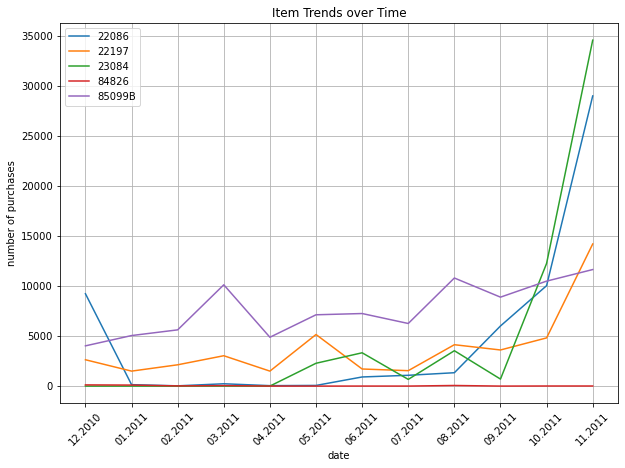

In [39]:
# Time series plot for the top 5 items

plot1 = pd.DataFrame(items_df.values).plot(
    figsize=(10,7),
    grid=True,
)

plot1.set_ylabel('number of purchases')
plot1.set_xlabel('date')
plot1.set_title('Item Trends over Time')

plot1.legend(items_df.columns, loc='upper left')

plt.xticks(
    range(len(items_df.index)), 
    [x.strftime('%m.%Y') for x in items_df.index], 
    rotation=45
)

plt.show()

### Q6. What do you observe?

### A6.

In this chart, we can see the number of purchases of 5 specific items in the form of 5 curves over the time period. We will go over each item one by one.

Item 22086: This item is the second best performing item in terms of number of purchases at the end of the year despite it not being purchased in the first 5 months of 2011.

Item 22197: This item is the third best performing item in terms of number of purchases at the end of the year. As compared to the above item, it had a considerable customer interest in terms of the purchases as it was never zero. It had a slow start in these terms.

Item 23084: This item is the best performing item in terms of number of purchases at the end of the year. It had the worst start in terms of number of purchases for the first 5 months of the time period as it had no purchases from December 2010 to April 2011.

Item 84826: This item is redundant and was the worst performer in terms of number of purchases. This item should be discontinued if no changes are possible. It had no purchases at all in the entire time period.

Item 85099B: This item is the lowest performing item after item 84826 at the end of the year. Like all the other items, this item also saw its highest number of purchases in November 2011. 

In [40]:
print(last_m_rev_sorted_df.head())

  InvoiceDate StockCode     Sales
0  2011-11-30       DOT  36905.40
1  2011-11-30     23084  34556.72
2  2011-11-30     22086  28985.04
3  2011-11-30     22197  14195.60
4  2011-11-30    85123A  14136.70


In [41]:
# Use the top 5 items by sales and find the monthly sales for those items 

m_sales_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin(['DOT', 23084, 22086,22197, '85123A'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum()
)
m_sales_item_df

Sales
InvoiceDate StockCode          
2010-12-31  22086       9225.80
            22197       2630.79
            85123A     10435.36
            DOT        24671.19
2011-01-31  22086        143.32
            22197       1495.48
            85123A     15223.21
            DOT        13921.82
2011-02-28  22086         24.95
            22197       2127.00
            85123A      5140.11
            DOT        10060.57
2011-03-31  22086        232.01
            22197       3032.81
            85123A      5597.90
            DOT        11829.71
2011-04-30  22086         44.03
            22197       1495.57
            85123A     10017.79
            DOT         7535.38
2011-05-31  22086         65.19
            22197       5151.63
            23084       2279.57
            85123A     11216.42
            DOT        10229.30
2011-06-30  22086        910.88
            22197       1706.91
            23084       3326.87
            85123A      4680.81
            DOT        11848.66
2011-07-31  22086       1077.93
            22197       1540.00
            23084        668.59
            85123A      8504.11
            DOT        12841.00
2011-08-31  22086       1334.94
            22197       4133.35
            23084       3533.57
            85123A      5620.57
            DOT        13400.52
2011-09-30  22086       6006.10
            22197       3607.13
            23084        699.78
            85123A      6957.46
            DOT        15177.40
2011-10-31  22086      10031.39
            22197       4813.95
            23084      12256.87
            85123A      4761.95
            DOT        17955.13
2011-11-30  22086      28985.04
            22197      14195.60
            23084      34556.72
            85123A     14136.70
            DOT        36905.40

In [42]:
# Transform this data into a tabular format where columns are the individual stock codes and the rows are the invoice dates

items_sales_df = m_sales_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
items_sales_df = items_sales_df.reset_index()
items_sales_df = items_sales_df.set_index('InvoiceDate')
items_sales_df.columns = items_sales_df.columns.droplevel(0)
items_sales_df

StockCode,22086,22197,23084,85123A,DOT
InvoiceDate,,,,,
2010-12-31,9225.80,2630.79,0.00,10435.36,24671.19
2011-01-31,143.32,1495.48,0.00,15223.21,13921.82
2011-02-28,24.95,2127.00,0.00,5140.11,10060.57
2011-03-31,232.01,3032.81,0.00,5597.90,11829.71
2011-04-30,44.03,1495.57,0.00,10017.79,7535.38
2011-05-31,65.19,5151.63,2279.57,11216.42,10229.30
2011-06-30,910.88,1706.91,3326.87,4680.81,11848.66
2011-07-31,1077.93,1540.00,668.59,8504.11,12841.00
2011-08-31,1334.94,4133.35,3533.57,5620.57,13400.52


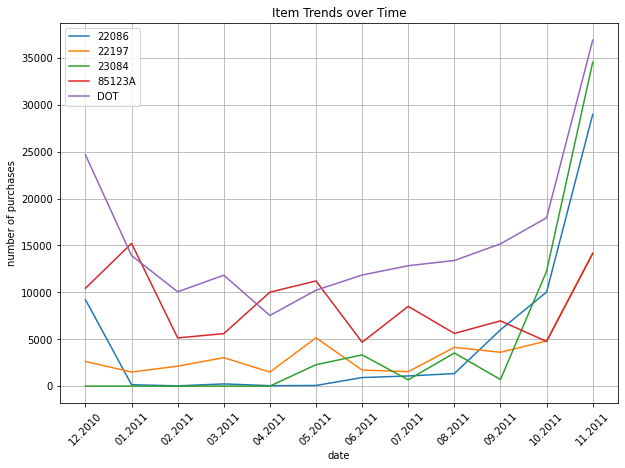

In [43]:
# Time series plot for the top 5 items

plot2 = pd.DataFrame(items_sales_df.values).plot(
    figsize=(10,7),
    grid=True,
)

plot2.set_ylabel('number of purchases')
plot2.set_xlabel('date')
plot2.set_title('Item Trends over Time')

plot2.legend(items_sales_df.columns, loc='upper left')

plt.xticks(
    range(len(items_sales_df.index)), 
    [x.strftime('%m.%Y') for x in items_sales_df.index], 
    rotation=45
)

plt.show()

### Q7. What do you observe?

### A7.
In this chart, we can see the number of purchases of 5 specific items in the form of 5 curves over the time period. We will go over each item one by one.

Item 22086: This item is the third best performing item in terms of number of purchases at the end of the year as well as at the start of the year.

Item 22197: This item is the worst performing item in terms of number of purchases at the end of the year because it had 0 purchases in November 2011. Also, at the start of the year, the performance was not good.

Item 23084: This item had the worst start in terms of performance but at the end of the year it was the second best performing item in November 2011 as shown by the green curve.

Item 85123A: This item had one of the best starts among the five at the start of the time period but it ended up being the second worst among the five at the end of the time period.

Item DOT: This item is undoubtedly the best item amongst the five as it had the best start as well as the best finish in terms of number of purchases as shown by the purple curve.

In [44]:
# Drop NaN records

df = df[pd.notnull(df['CustomerID'])]

In [45]:
df.shape

(380620, 9)

In [46]:
# Summarize the data for each order or InvoiceNo

orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
            'Sales': sum,
            'InvoiceDate': max
        })

In [47]:
orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]

# Calculate Frequency, Recency, and Total Amount of purchases by each customer

In [48]:
# Group first by Customer ID first and then aggregate by sales and Invoice Date

def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'


summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})

In [49]:
summary_df.head()

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000     1   
12347.0       382.52   1294.32   4085.18    680.863333     6   
12348.0       227.44    892.80   1797.24    449.310000     4   
12349.0      1757.55   1757.55   1757.55   1757.550000     1   
12350.0       334.40    334.40    334.40    334.400000     1   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   

                               
           purchase_frequency  
CustomerID                     
12346.0                   0.0  
12347.0                  54.5  
12348.0                  70.5  
12349.0                   0.0  
12350.0                   0.0

In [50]:
# Distribution of the number of purchases that the repeat customers have made

summary_df.columns = ['_'.join(col) for col in summary_df.columns]
summary_df = summary_df.loc[summary_df['InvoiceDate_purchase_duration'] > 1]

In [51]:
summary_df.head()

,Sales_min,Sales_max,Sales_sum,Sales_avg,Sales_count,InvoiceDate_min,InvoiceDate_max,InvoiceDate_purchase_duration,InvoiceDate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12352.0,120.33,840.30,2506.04,313.255000,8,2011-02-16 12:33:00,2011-11-03 14:37:00,260,32.500000
12356.0,58.35,2271.62,2811.43,937.143333,3,2011-01-18 09:50:00,2011-11-17 08:40:00,302,100.666667
12359.0,547.50,2876.85,6372.58,1593.145000,4,2011-01-12 12:43:00,2011-10-13 12:47:00,274,68.500000


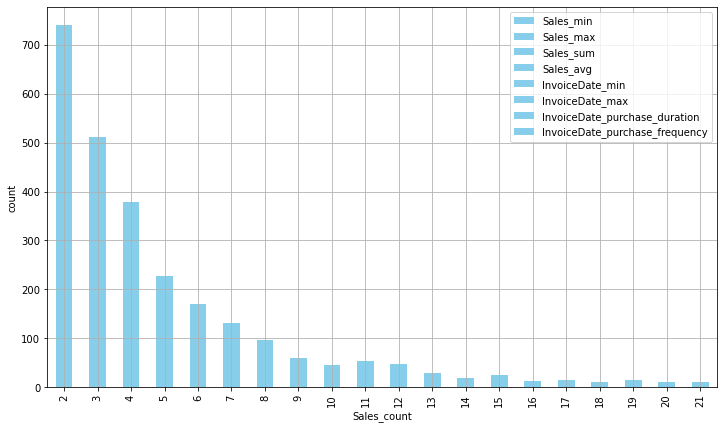

In [52]:
# Group by sales_count and plot the sales_count with customers with more than 1 purchase

ax = summary_df.groupby('Sales_count').count()[:20].plot(
    kind='bar', 
    color='skyblue',
    figsize=(12,7), 
    grid=True
)

ax.set_ylabel('count')

plt.show()

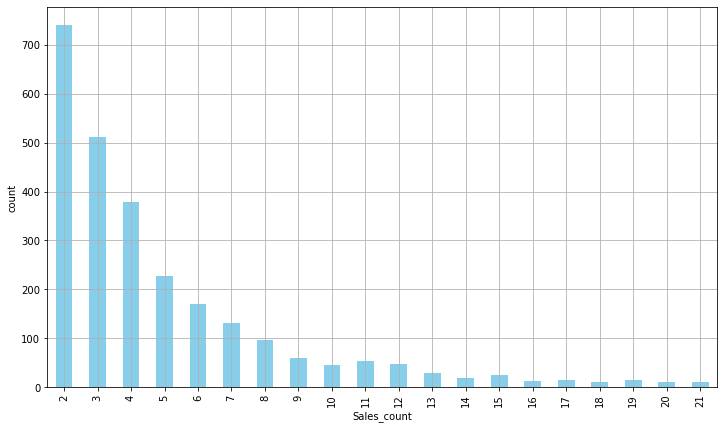

In [53]:
ax = summary_df.groupby('Sales_count').count()['Sales_sum'][:20].plot(
    kind='bar', 
    color='skyblue',
    figsize=(12,7), 
    grid=True
)

ax.set_ylabel('count')

plt.show()

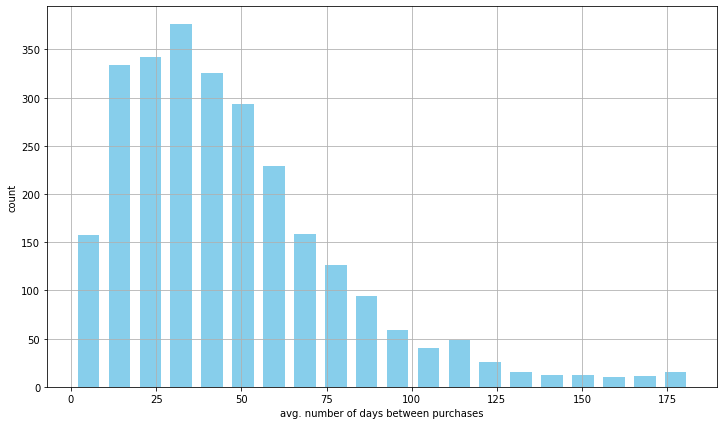

In [54]:
# Average number of days between purchases for these repeat customers

ax = summary_df['InvoiceDate_purchase_frequency'].hist(
    bins=20,
    color='skyblue',
    rwidth=0.7,
    figsize=(12,7)
)

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

# Predict 3 Month Customer Lifetime Value (CLV)

In [55]:
clv_freq = '3M'

In [56]:
# Break down data into 3 months chunk
# https://pbpython.com/pandas-grouper-agg.html more info 

data_df = orders_df.reset_index().groupby([
    'CustomerID',
    pd.Grouper(key='InvoiceDate', freq='3M')
]).agg({
    'Sales': [sum, groupby_mean, groupby_count],
})

data_df.columns = ['_'.join(col) for col in data_df.columns]
data_df = data_df.reset_index()

In [57]:
data_df.head(10)

,CustomerID,InvoiceDate,Sales_sum,Sales_avg,Sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1
1,12347.0,2010-12-31,711.79,711.790,1
2,12347.0,2011-03-31,475.39,475.390,1
3,12347.0,2011-06-30,1018.77,509.385,2
4,12347.0,2011-09-30,584.91,584.910,1
5,12347.0,2011-12-31,1294.32,1294.320,1
6,12348.0,2010-12-31,892.80,892.800,1
7,12348.0,2011-03-31,227.44,227.440,1
8,12348.0,2011-06-30,367.00,367.000,1
9,12348.0,2011-09-30,310.00,310.000,1


In [58]:
# Encode the InvoiceDate column

date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)
    )
}

data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

In [59]:
data_df.head(10)

,CustomerID,InvoiceDate,Sales_sum,Sales_avg,Sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1,M_4
1,12347.0,2010-12-31,711.79,711.790,1,M_5
2,12347.0,2011-03-31,475.39,475.390,1,M_4
3,12347.0,2011-06-30,1018.77,509.385,2,M_3
4,12347.0,2011-09-30,584.91,584.910,1,M_2
5,12347.0,2011-12-31,1294.32,1294.320,1,M_1
6,12348.0,2010-12-31,892.80,892.800,1,M_5
7,12348.0,2011-03-31,227.44,227.440,1,M_4
8,12348.0,2011-06-30,367.00,367.000,1,M_3
9,12348.0,2011-09-30,310.00,310.000,1,M_2


In [60]:
# Transform this data into tabular data, where the rows represent the individual customers and the columns represent each feature using Pivot table

features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M_1'], 
    values=['Sales_sum', 'Sales_avg', 'Sales_count'], 
    columns='M', 
    index='CustomerID'
)

features_df.columns = ['_'.join(col) for col in features_df.columns]

In [61]:
features_df = features_df.fillna(0)

In [62]:
features_df.head()

,Sales_avg_M_2,Sales_avg_M_3,Sales_avg_M_4,Sales_avg_M_5,Sales_count_M_2,Sales_count_M_3,Sales_count_M_4,Sales_count_M_5,Sales_sum_M_2,Sales_sum_M_3,Sales_sum_M_4,Sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00
12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00


In [63]:
# last 3 months 'M1' group and Sales_sum as the target variable as we want to prdict sales for 3 months

response_df = data_df.loc[
    data_df['M'] == 'M_1',
    ['CustomerID', 'Sales_sum']
]

response_df.columns = ['CustomerID', 'CLV_'+'3M']

In [64]:
response_df.head(10)

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67
25,12359.0,2876.85
28,12360.0,1043.78
33,12362.0,2119.85
37,12364.0,299.06
41,12370.0,739.28


In [65]:
# Combine the 2 sets together

sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)

In [66]:
sample_set_df.head()

,Sales_avg_M_2,Sales_avg_M_3,Sales_avg_M_4,Sales_avg_M_5,Sales_count_M_2,Sales_count_M_3,Sales_count_M_4,Sales_count_M_5,Sales_sum_M_2,Sales_sum_M_3,Sales_sum_M_4,Sales_sum_M_5,CustomerID,CLV_3M
NaN,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,0.00
5.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
NaN,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,0.00
NaN,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,0.00
14.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73


# Linear Regression

In [67]:
from sklearn.model_selection import train_test_split

target_var = 'CLV_'+'3M'
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]

x_train, x_test, y_train, y_test = train_test_split(
    sample_set_df[all_features], 
    sample_set_df[target_var], 
    test_size=0.2
)

In [68]:
from sklearn.linear_model import LinearRegression

reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression()

In [69]:
# Calculate the intercept

reg_fit.intercept_

94.93297058229967

In [70]:
# Calculate the coefficient

reg_fit.coef_

array([  0.10753582,  -0.45084027,  -0.21935198,  -0.45007264,
        94.10903898,  13.23858223, -85.56346244, -75.96356907,
         0.27843366,   0.3113226 ,   0.24779063,   0.77995029])

In [71]:
coef=pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns =['feature', 'coef']

In [72]:
coef

,feature,coef
0,Sales_avg_M_2,0.107536
1,Sales_avg_M_3,-0.450840
2,Sales_avg_M_4,-0.219352
3,Sales_avg_M_5,-0.450073
4,Sales_count_M_2,94.109039
5,Sales_count_M_3,13.238582
6,Sales_count_M_4,-85.563462
7,Sales_count_M_5,-75.963569
8,Sales_sum_M_2,0.278434
9,Sales_sum_M_3,0.311323


# Evaluate the Regression Model performance

In [73]:
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [74]:
from sklearn.metrics import r2_score, median_absolute_error

In [75]:
print('In-Sample R-Squared: %0.4f' % r2_score(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true=y_test, y_pred=test_preds))

In-Sample R-Squared: 0.7487
Out-of-Sample R-Squared: 0.5256


In [76]:
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

In-Sample MSE: 220.2287
Out-of-Sample MSE: 208.7609


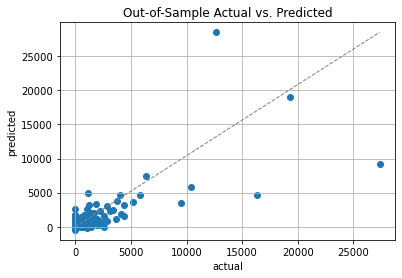

In [77]:
# Scatter plot of predicted versus actual.

plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()

### Q8. Comment on the results of Product and Customer Analytics from a marketing perspective

### A8.
From the analysis performed above, we can see that:

From the product analysis we see:

1) Item DOT and Item 23084 were the best performing items in terms of number of purchases in the given time period. This means that the marketing strategies used for these items could be tried for other items in order to increase the revenue generated by them.

2) Item 84826 generated no revenue at all in the given time period and should be shelved unless it is revamped with either product changes to increase customer satisfaction and/or the marketing strategy for selling this product is changed completely.

3) The items whose starting periods are unpopular i.e for the items that did not do well in the start of the time period (4-5 months), a change in marketing strategy can be the first step to increase the overall revenue from these products as well as generate revenue across the time period.

From the customer analytics we see:

We have done 2 different analysis for customers one if frequency,recency and total amount spent analysis for customers and other is the prediction of 3 month customer lifetime value.

1) From the former analysis, we identified that average number of days passed between purchases. We can see that majority of the gaps between purchases in average number of days is relatively lower between 20 to 60 days, and very few purchases have a gap of more than 100 days. Also, that the sales count of repeat customers. We can see that majority of the sales count lies between 2 to 7 purchases and it decreases gradually as the count increases although there are some exceptions to this phenomenon. 

2) From the later analysis, we found out that we broke down the data into chunks of 3 months and then predicted the sales for 3 months based on this change. We created a linear regression model for predicting CLV. From the graph, we can see the model’s actual vs predicted phenomenon. As we can see most of the data points are aggregated close to the linear regression line. This means that the CLV is high for these customers.